In [1]:
import pandas as pd

In [2]:
inputs = pd.read_csv("titanic.csv")

In [3]:
inputs.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
inputs.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [5]:
inputs.head(2)


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833


In [6]:
target = inputs[['Survived']]

In [7]:
inputs.drop(['Survived'],axis='columns',inplace=True)

In [8]:
dummies = pd.get_dummies(inputs.Sex)

In [10]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [12]:
inputs = pd.concat([inputs,dummies], axis='columns')

In [14]:
inputs.drop(['Sex'],axis='columns',inplace=True)

In [17]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [18]:
inputs[:10]

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,NaN,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [19]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [20]:
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [22]:
inputs['Age'] = inputs['Age'].astype(int)

In [25]:
from sklearn.model_selection import train_test_split
    

In [30]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
model = GaussianNB()

In [34]:
model.fit(X_train,y_train)

/Users/kamlishgoswami/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [44]:
y_pred = model.predict(X_test)

In [37]:
model.score(X_test,y_test)

0.7821229050279329

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

cm

In [48]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

<AxesSubplot:>

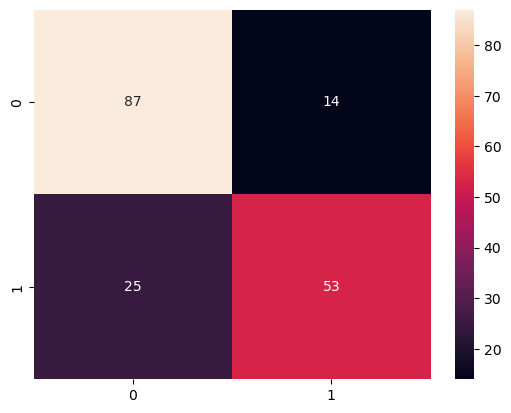

In [56]:
sn.heatmap(cm, annot=True)

